# Extract linguistic features

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.utils import shuffle

from sarcsdet.utils.mark_ling_feat import (
    funny_marks_feature, interjections_feature, get_popular_items
)

### Get data

In [2]:
data_path = '../data/Quotes'

In [3]:
with open(os.path.join(data_path, 'quote_tokenized.pickle'), 'rb') as f:
    df = shuffle(pickle.load(f))

### Column selection

In [4]:
df['quote'] = pd.Series(df['quote'], dtype='str')

df['target'] = pd.Series(df['target'], dtype='int')

df['rating'] = df['rating'].fillna(value=0)
df['rating'] = pd.Series(df['rating'], dtype=pd.Int64Dtype())

df['comments_count'] = df['comments_count'].fillna(value=0)
df['comments_count'] = pd.Series(df['comments_count'], dtype=pd.Int64Dtype())

df['source'] = pd.Series(df['source'], dtype='category')
df['source'] = pd.factorize(df['source'])[0] + 1

df['submitted_by'] = pd.Series(df['submitted_by'], dtype='category')
df['submitted_by'] = pd.factorize(df['submitted_by'])[0] + 1

df['author'] = get_popular_items(df['author'])
df['character'] = get_popular_items(df['character'])

### Add Linguistic Features

In [5]:
df['exclamation'] = df.quote.apply(lambda s: s.count('!'))
df['question'] = df.quote.apply(lambda s: s.count('?'))
df['dotes'] = df.quote.apply(lambda s: s.count('...'))
df['quotes'] = df.quote.apply(lambda s: s.count("\"") + s.count("\'"))

In [6]:
df['funny_mark'] = df.quote.apply(funny_marks_feature)

In [7]:
df['interjections'] = df.quote.apply(interjections_feature)

In [8]:
df.head()

,quote,tags,rating,rating_positive,rating_negative,submitted_by,submitted_date,comments_count,author,character,is_dialog,target,source,quote_tokenized,exclamation,question,dotes,quotes,funny_mark,interjections
176875,Нарушителей правил сначала называют преступник...,"[правила, жизненные]",14,14,0,1,2015-02-12 02:18:00,0,0,0,0,0,1,нарушитель правило сначала называть преступник...,0,0,0,0,0,0
304318,Фашизм — бунт невежества.,[фашизм],0,None,None,0,None,0,334,0,0,0,0,фашизм бунт невежество,0,0,0,0,0,0
380572,"— Надежда Ивановна, айфон намного лучше вашего...","[телефоны, смешные]",0,None,None,0,None,0,2424,0,1,0,2,надежда ивановна айфон намного ваш старый теле...,2,1,2,0,0,0
63155,Джерри какое-то время ... проведет... в развод...,"[развод, смешные]",5,5,0,2,2017-08-13 12:06:00,0,0,4060,0,0,3,джерри какоето время проводить развод,0,0,3,0,0,0
333192,Я и так неадекватный человек — зачем меня дово...,[],0,0,0,3,2018-02-07 15:10:00,0,0,0,0,0,0,неадекватный человек доводить,0,1,0,0,0,0


### Choose Features

In [9]:
df = df[[
    'quote', 'quote_tokenized', 'rating', 'comments_count', 'source', 'submitted_by', 
    'exclamation', 'question', 'quotes', 'dotes', 'funny_mark', 'interjections', 'target'
]]

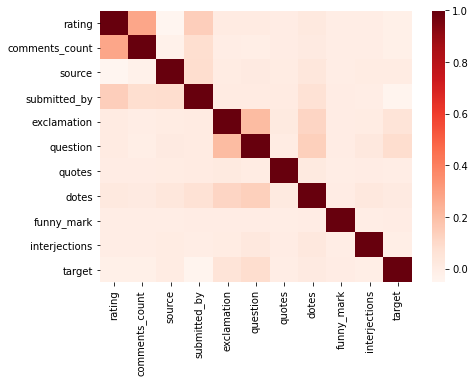

In [10]:
plt.figure(figsize=(7, 5))
cor = df.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

### Save dataset

In [11]:
with open(os.path.join(data_path, 'quotes_ling_feats.pickle'), 'wb') as f:
    pickle.dump(df, f)